# Titanic Data

In [102]:
import pandas as pd
import numpy as np

In [105]:
from google.colab import files
uploaded = files.upload()

Saving Titanic_test.csv to Titanic_test (2).csv


In [104]:
Titanic_train = pd.read_csv('Titanic_train.csv')

In [106]:
Titanic_test = pd.read_csv('Titanic_test.csv')

## Exploratory Data Analysis (EDA)



In [107]:
Titanic_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [108]:
Titanic_test.head()

PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S

In [109]:
Titanic_train.shape

(891, 12)

In [110]:
Titanic_test.shape

(418, 11)

In [111]:
# Checking for missing values in train data
Titanic_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [112]:
# Checking for missing values in test data
Titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

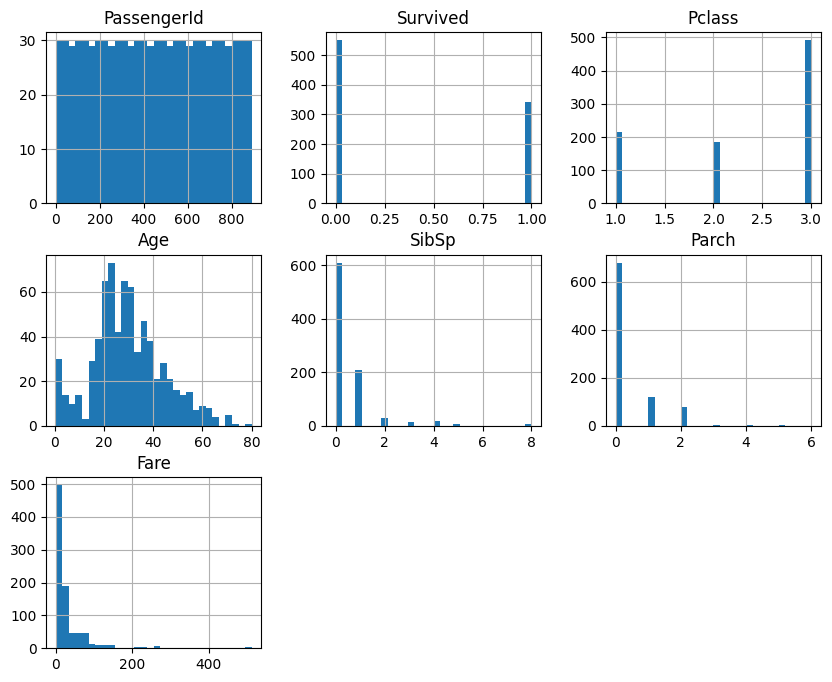

In [113]:
# Data distribution using histogram
import matplotlib.pyplot as plt
import seaborn as sns

Titanic_train.hist(bins=30, figsize=(10,8))
plt.show()

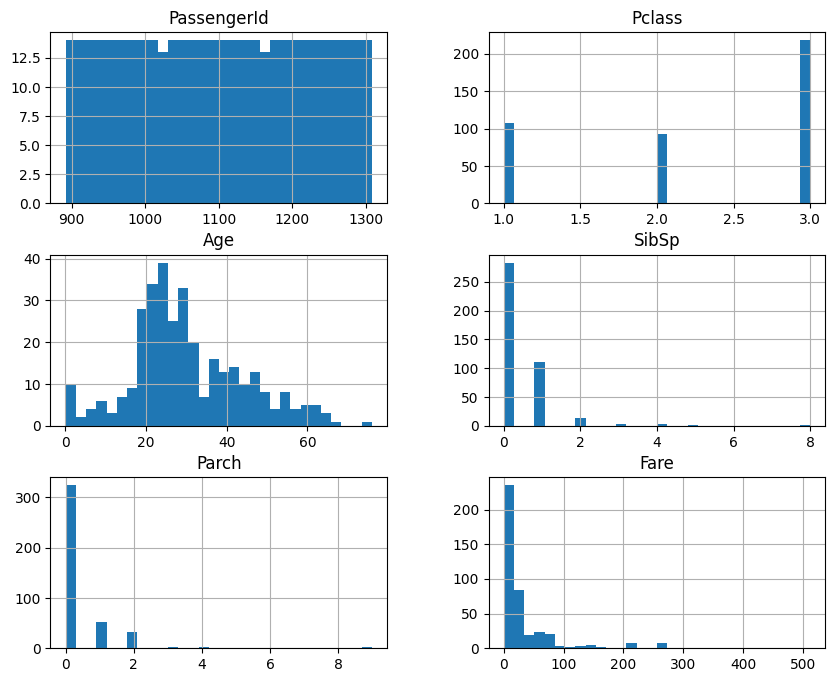

In [114]:
Titanic_test.hist(bins=30, figsize=(10,8))
plt.show()

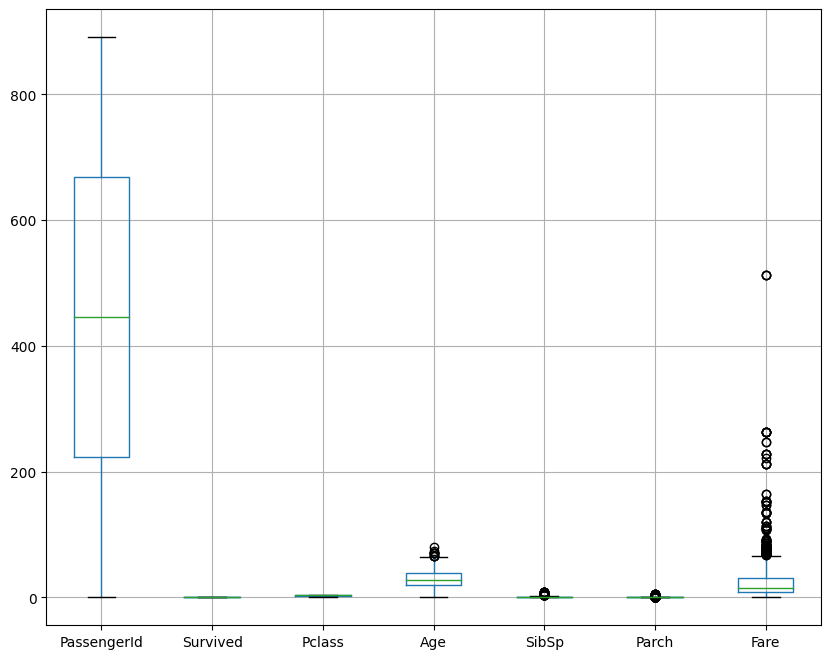

In [115]:
# Data distribution using boxplot
Titanic_train.boxplot(figsize=(10,8))
plt.show()

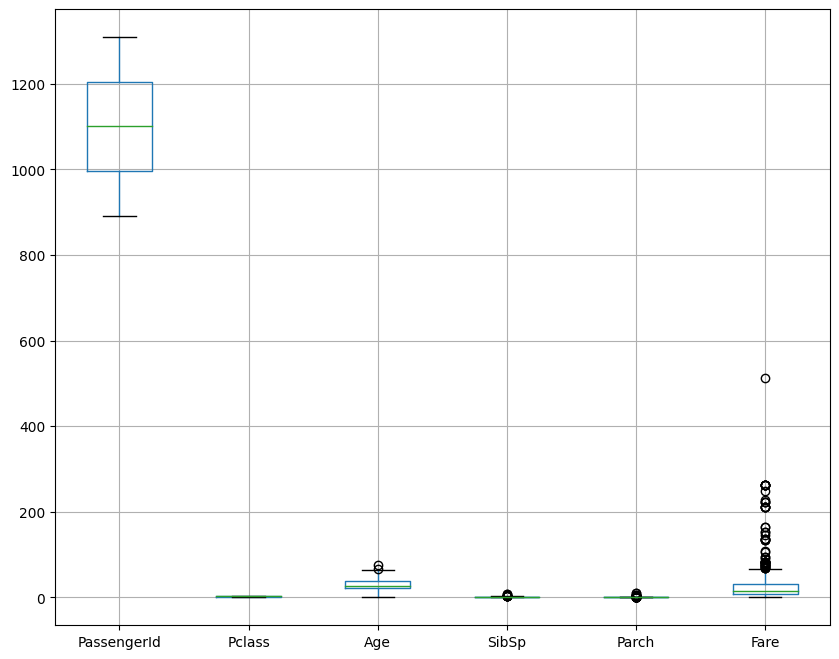

In [116]:
Titanic_test.boxplot(figsize=(10,8))
plt.show()

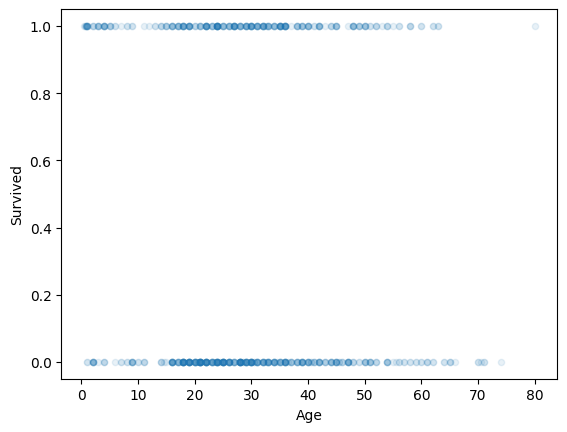

In [117]:
#isualizing relationships between features and survival using scatter plots
Titanic_train.plot(kind='scatter', x='Age', y='Survived', alpha=0.1)
plt.show()

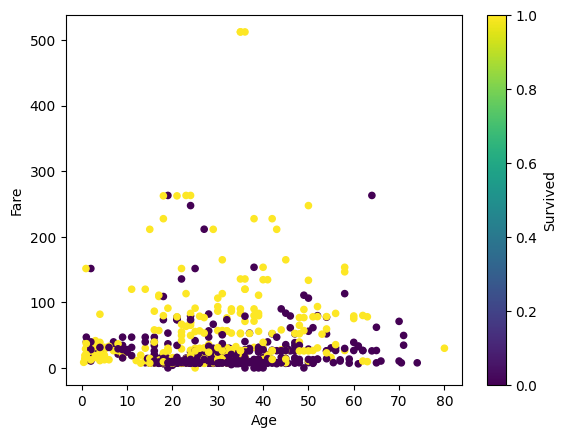

In [118]:
# Scatter plot (Age vs Fare)
Titanic_train.plot.scatter(x='Age', y='Fare', c='Survived', colormap='viridis')
plt.show()

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:1266: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


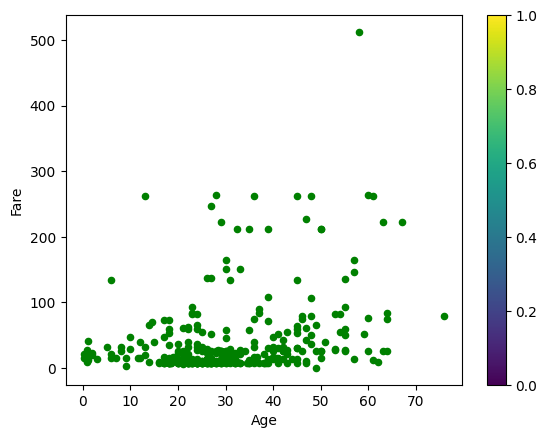

In [119]:
# Scatter plot (Age vs Fare)
Titanic_test.plot.scatter(x='Age', y='Fare', c='g', colormap='viridis')
plt.show()

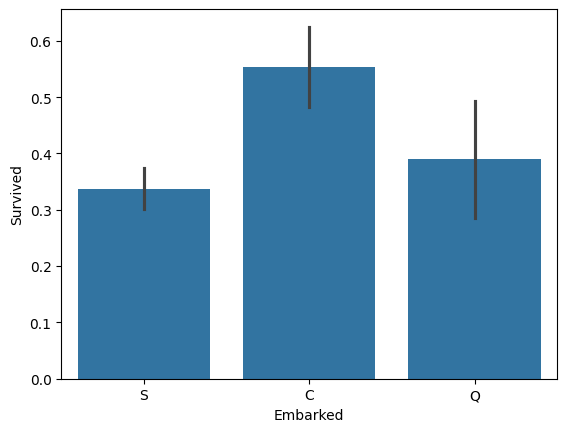

In [120]:
# Bar plot (Embarked vs Survival)
sns.barplot(x='Embarked', y='Survived', data=Titanic_train)
plt.show()

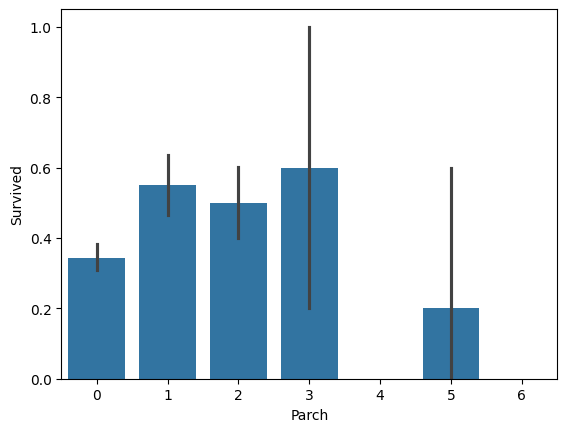

In [121]:
# Bar plot (Parch Vs Survived)
sns.barplot(x='Parch', y='Survived', data=Titanic_train)
plt.show()

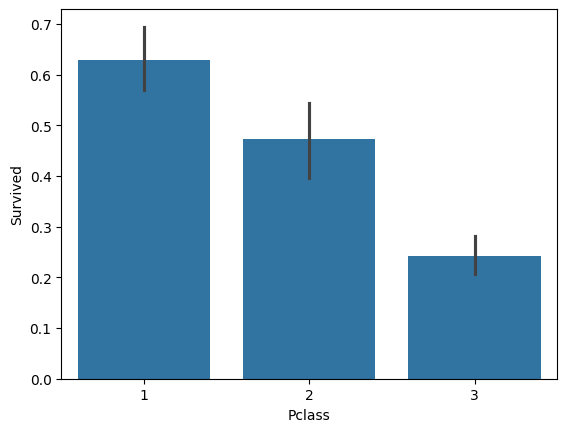

In [122]:
# Bar plot (Pclass Vs Survived)
sns.barplot(x='Pclass', y='Survived', data=Titanic_train)
plt.show()

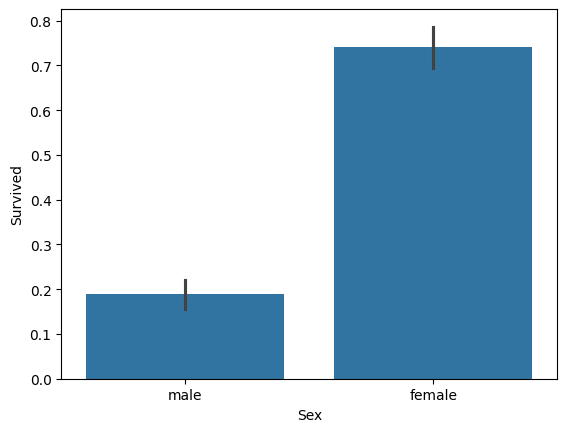

In [123]:
# Barplot (Sex Vs Survived)
sns.barplot(x='Sex', y='Survived', data=Titanic_train)
plt.show()

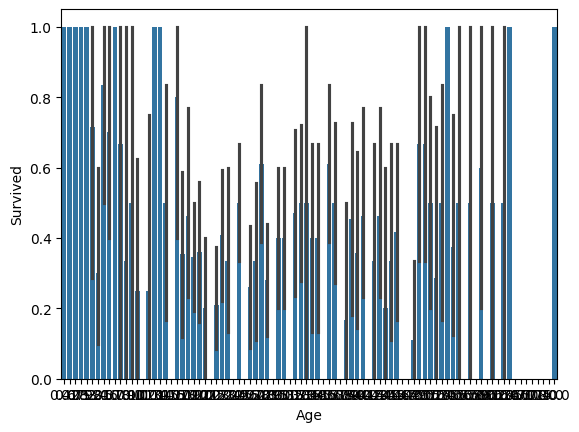

In [124]:
sns.barplot(x='Age', y='Survived', data=Titanic_train).binsize = 20
plt.show()

## Data Preprocessing

In [125]:
# Impute Missing Values
# For age, filling the missing values using the median
Titanic_train['Age'].fillna(Titanic_train['Age'].median(), inplace=True)
Titanic_test['Age'].fillna(Titanic_test['Age'].median(), inplace=True)

In [126]:
# For Cabin, since it has a large number of missing values (687 out of 891 total rows), we can either drop the column or
# create a new feature that indicates whether the Cabin is missing or not

#Replacing the Cabin column with a new column with boolean values - 1 for cabin present and 0 for cabin missing
Titanic_train['Cabin'] = Titanic_train['Cabin'].notnull().astype(int)
Titanic_test['Cabin'] = Titanic_test['Cabin'].notnull().astype(int)

In [127]:
# For Embark, Since Embarked is a categorical variable and only two values are missing, you can fill these values with the most frequent category (mode())
Titanic_train['Embarked'].fillna(Titanic_train['Embarked'].mode()[0], inplace=True)
Titanic_test['Embarked'].fillna(Titanic_test['Embarked'].mode()[0], inplace=True)

In [128]:
# For Fare, since it has only one null value, replacing it with median
Titanic_test['Fare'].fillna(Titanic_test['Fare'].median(), inplace=True)

In [129]:
Titanic_train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [130]:
Titanic_test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [131]:
# One-Hot Encoding for categorical variables
Titanic_train = pd.get_dummies(Titanic_train, columns=['Sex', 'Embarked'], drop_first=True)
Titanic_test = pd.get_dummies(Titanic_test, columns=['Sex', 'Embarked'], drop_first=True)

In [132]:
Titanic_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  Cabin  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500      0      True       False        True  
1          PC 17599  71.2833      1     False       False       False  
2  STON/O2. 3101282   7.9250      0     False       False        True  
3            113803  53.1000      1     False       False        True  
4            373450   8.0500      0      True       False        True

In [133]:
Titanic_test.head()

PassengerId  Pclass                                          Name   Age  \
0          892       3                              Kelly, Mr. James  34.5   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  47.0   
2          894       2                     Myles, Mr. Thomas Francis  62.0   
3          895       3                              Wirz, Mr. Albert  27.0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  22.0   

   SibSp  Parch   Ticket     Fare  Cabin  Sex_male  Embarked_Q  Embarked_S  
0      0      0   330911   7.8292      0      True        True       False  
1      1      0   363272   7.0000      0     False       False        True  
2      0      0   240276   9.6875      0      True        True       False  
3      0      0   315154   8.6625      0      True       False        True  
4      1      1  3101298  12.2875      0     False       False        True

In [134]:
Titanic_train[['Sex_male',	'Embarked_Q',	'Embarked_S']] = Titanic_train[['Sex_male',	'Embarked_Q',	'Embarked_S']].astype(int)

In [135]:
Titanic_test[['Sex_male',	'Embarked_Q',	'Embarked_S']] = Titanic_test[['Sex_male',	'Embarked_Q',	'Embarked_S']].astype(int)

In [136]:
Titanic_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare  Cabin  Sex_male  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500      0         1           0           1  
1          PC 17599  71.2833      1         0           0           0  
2  STON/O2. 3101282   7.9250      0         0           0           1  
3            113803  53.1000      1         0           0           1  
4            373450   8.0500      0         1           0           1

In [137]:
Titanic_test.head()

PassengerId  Pclass                                          Name   Age  \
0          892       3                              Kelly, Mr. James  34.5   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  47.0   
2          894       2                     Myles, Mr. Thomas Francis  62.0   
3          895       3                              Wirz, Mr. Albert  27.0   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  22.0   

   SibSp  Parch   Ticket     Fare  Cabin  Sex_male  Embarked_Q  Embarked_S  
0      0      0   330911   7.8292      0         1           1           0  
1      1      0   363272   7.0000      0         0           0           1  
2      0      0   240276   9.6875      0         1           1           0  
3      0      0   315154   8.6625      0         1           0           1  
4      1      1  3101298  12.2875      0         0           0           1

In [138]:
# More Preprocessing

In [139]:
# using feature engineerin for creating a FamilySize feature
Titanic_train['FamilySize'] = Titanic_train['SibSp'] + Titanic_train['Parch'] + 1

In [140]:
Titanic_test['FamilySize'] = Titanic_test['SibSp'] + Titanic_test['Parch'] + 1

In [141]:
# Dropping unnecessary columns
Titanic_train.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

In [142]:
Titanic_test.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

In [143]:
Titanic_train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare    Sex_male  Embarked_Q  Embarked_S  FamilySize  
count  891.000000  891.000000  891.000000  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    0.647587    0.086420    0.725028    1.904602  
std      0.806057   49.693429    0.477990    0.281141    0.446751    1.613459  
min      0.000000    0.000000    0.000000    0.000000    0.000000    1.000000  
25%      0.000000    7.910400    0.000000    0.000000    0.000000    1.000000  
50%      0.000000   14.454200    1.000000    0.000000    1.000000    1.000000  
75%      0.000000   31.000000    1.000000    0.000000    1.000000    2.000000  
max      6.000000  512.329200    1.000000    1.000000    1.000000   11.000000

In [144]:
# Standardsing Age and Fare columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Titanic_train[['Age', 'Fare']] = scaler.fit_transform(Titanic_train[['Age', 'Fare']])
Titanic_test[['Age', 'Fare']] = scaler.transform(Titanic_test[['Age', 'Fare']])

In [145]:
Titanic_train.describe()

PassengerId    Survived      Pclass           Age       SibSp  \
count   891.000000  891.000000  891.000000  8.910000e+02  891.000000   
mean    446.000000    0.383838    2.308642  2.272780e-16    0.523008   
std     257.353842    0.486592    0.836071  1.000562e+00    1.102743   
min       1.000000    0.000000    1.000000 -2.224156e+00    0.000000   
25%     223.500000    0.000000    2.000000 -5.657365e-01    0.000000   
50%     446.000000    0.000000    3.000000 -1.046374e-01    0.000000   
75%     668.500000    1.000000    3.000000  4.333115e-01    1.000000   
max     891.000000    1.000000    3.000000  3.891554e+00    8.000000   

            Parch          Fare    Sex_male  Embarked_Q  Embarked_S  \
count  891.000000  8.910000e+02  891.000000  891.000000  891.000000   
mean     0.381594  3.987333e-18    0.647587    0.086420    0.725028   
std      0.806057  1.000562e+00    0.477990    0.281141    0.446751   
min      0.000000 -6.484217e-01    0.000000    0.000000    0.000000   
25%      0.000000 -4.891482e-01    0.000000    0.000000    0.000000   
50%      0.000000 -3.573909e-01    1.000000    0.000000    1.000000   
75%      0.000000 -2.424635e-02    1.000000    0.000000    1.000000   
max      6.000000  9.667167e+00    1.000000    1.000000    1.000000   

       FamilySize  
count  891.000000  
mean     1.904602  
std      1.613459  
min      1.000000  
25%      1.000000  
50%      1.000000  
75%      2.000000  
max     11.000000

In [146]:
Titanic_test.describe()

PassengerId      Pclass         Age       SibSp       Parch  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    2.265550    0.018267    0.447368    0.392344   
std     120.810458    0.841838    0.976283    0.896760    0.981429   
min     892.000000    1.000000   -2.243369    0.000000    0.000000   
25%     996.250000    1.000000   -0.488887    0.000000    0.000000   
50%    1100.500000    3.000000   -0.181487    0.000000    0.000000   
75%    1204.750000    3.000000    0.490949    1.000000    0.000000   
max    1309.000000    3.000000    3.584155    8.000000    9.000000   

             Fare    Sex_male  Embarked_Q  Embarked_S  FamilySize  
count  418.000000  418.000000  418.000000  418.000000  418.000000  
mean     0.067901    0.636364    0.110048    0.645933    1.839713  
std      1.124524    0.481622    0.313324    0.478803    1.519072  
min     -0.648422    0.000000    0.000000    0.000000    1.000000  
25%     -0.489442    0.000000    0.000000    0.000000    1.000000  
50%     -0.357391    1.000000    0.000000    1.000000    1.000000  
75%     -0.014745    1.000000    0.000000    1.000000    2.000000  
max      9.667167    1.000000    1.000000    1.000000   11.000000

## Building Predictive Models

In [147]:
# Split the Titanic_train dataset into independent (X) and target/dependent variable (y)
X = Titanic_train.drop(columns=['Survived'])
y = Titanic_train['Survived']

In [148]:
# Split into training and testing/validation sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [149]:
# LightGBM
import lightgbm as lgb
from sklearn.metrics import accuracy_score

# building LightGB model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# predicting and evaluating validation set
y_pred_lgb = lgb_model.predict(X_val)
accuracy_lgb = accuracy_score(y_val, y_pred_lgb)
print("LightGBM Accuracy:", accuracy_lgb)

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000164 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [150]:
# XGBoost Model
import xgboost as xgb
from sklearn.metrics import accuracy_score

# building XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# predicting and evaluating validation set
y_pred_xgb = xgb_model.predict(X_val)
accuracy_xgb = accuracy_score(y_val, y_pred_xgb)
print(f"XGBoost Accuracy: {accuracy_xgb}")

XGBoost Accuracy: 0.7988826815642458


In [151]:
# Making Predictions on Titanic_test data set
predictions_lgb = lgb_model.predict(Titanic_test)
predictions_lgb

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [152]:
predictions_xgb = xgb_model.predict(Titanic_test)

In [154]:
# exporting the predictions to a csv
output_lgb = pd.DataFrame({'PassengerId': Titanic_test['PassengerId'], 'Survived': predictions_lgb})
output_lgb.to_csv('output_lgb.csv', index=False)

In [155]:
# downloading the outout_lgb.csv file
from google.colab import files
files.download('output_lgb.csv') # similarly we can download the xgb file as well

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Optimization of model performance by using cross validation and hyperparameter tuning

In [156]:
# Cross validation and hypreparameter tuning for LightGBM
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# Create the model
lgb_model = lgb.LGBMClassifier()

# Define parameters for tuning
param_grid_lgb = {
    'num_leaves': [20, 31, 40],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7]
}

# Cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Grid search for hyperparameter tuning
grid_search_lgb = GridSearchCV(estimator=lgb_model, param_grid=param_grid_lgb, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the model
grid_search_lgb.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters (LightGBM): ", grid_search_lgb.best_params_)
print("Best Accuracy (LightGBM): ", grid_search_lgb.best_score_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000156 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [

In [157]:
# Cross validation and hypreparameter tuning for XGBM
from sklearn.model_selection import RandomizedSearchCV

# Create the model
xgb_model = xgb.XGBClassifier()

# Define parameters for tuning
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Random search for hyperparameter tuning
random_search_xgb = RandomizedSearchCV(estimator=xgb_model, param_distributions=param_grid_xgb, n_iter=100, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1, random_state=42)

# Fit the model
random_search_xgb.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters (XGBoost): ", random_search_xgb.best_params_)
print("Best Accuracy (XGBoost): ", random_search_xgb.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters (XGBoost):  {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 0.6}
Best Accuracy (XGBoost):  0.8328474342558849


In [158]:
from sklearn.model_selection import cross_val_score

# Get the best models
best_lgb_model = grid_search_lgb.best_estimator_
best_xgb_model = random_search_xgb.best_estimator_

# Evaluate using cross-validation
lgb_scores = cross_val_score(best_lgb_model, X_train, y_train, cv=cv, scoring='accuracy')
xgb_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=cv, scoring='accuracy')

print("Cross-Validation Accuracy (LightGBM): ", lgb_scores.mean())
print("Cross-Validation Accuracy (XGBoost): ", xgb_scores.mean())

[LightGBM] [Info] Number of positive: 214, number of negative: 355
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 379
[LightGBM] [Info] Number of data points in the train set: 569, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376098 -> initscore=-0.506142
[LightGBM] [Info] Start training from score -0.506142
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

In [160]:
# Train the best models on the training set
best_lgb_model.fit(X_train, y_train)
best_xgb_model.fit(X_train, y_train)

# Predict on the validation set
y_pred_lgb = best_lgb_model.predict(X_val)
y_pred_xgb = best_xgb_model.predict(X_val)

# Evaluate using validation data
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# LightGBM metrics
print("LightGBM Accuracy: ", accuracy_score(y_val, y_pred_lgb))
print("LightGBM Precision: ", precision_score(y_val, y_pred_lgb))
print("LightGBM Recall: ", recall_score(y_val, y_pred_lgb))
print("LightGBM F1-Score: ", f1_score(y_val, y_pred_lgb))

# XGBoost metrics
print("XGBoost Accuracy: ", accuracy_score(y_val, y_pred_xgb))
print("XGBoost Precision: ", precision_score(y_val, y_pred_xgb))
print("XGBoost Recall: ", recall_score(y_val, y_pred_xgb))
print("XGBoost F1-Score: ", f1_score(y_val, y_pred_xgb))

[LightGBM] [Info] Number of positive: 268, number of negative: 444
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 444
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.376404 -> initscore=-0.504838
[LightGBM] [Info] Start training from score -0.504838
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

## Comparative Analysis

In [162]:
# LightGBM metrics
lgb_accuracy = accuracy_score(y_val, y_pred_lgb)
lgb_precision = precision_score(y_val, y_pred_lgb)
lgb_recall = recall_score(y_val, y_pred_lgb)
lgb_f1 = f1_score(y_val, y_pred_lgb)

# XGBoost metrics
xgb_accuracy = accuracy_score(y_val, y_pred_xgb)
xgb_precision = precision_score(y_val, y_pred_xgb)
xgb_recall = recall_score(y_val, y_pred_xgb)
xgb_f1 = f1_score(y_val, y_pred_xgb)

# Displaying the results in a table
results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score'],
    'LightGBM': [lgb_accuracy, lgb_precision, lgb_recall, lgb_f1],
    'XGBoost': [xgb_accuracy, xgb_precision, xgb_recall, xgb_f1]
})

print(results)

      Metric  LightGBM   XGBoost
0   Accuracy  0.815642  0.821229
1  Precision  0.805970  0.818182
2     Recall  0.729730  0.729730
3   F1-Score  0.765957  0.771429


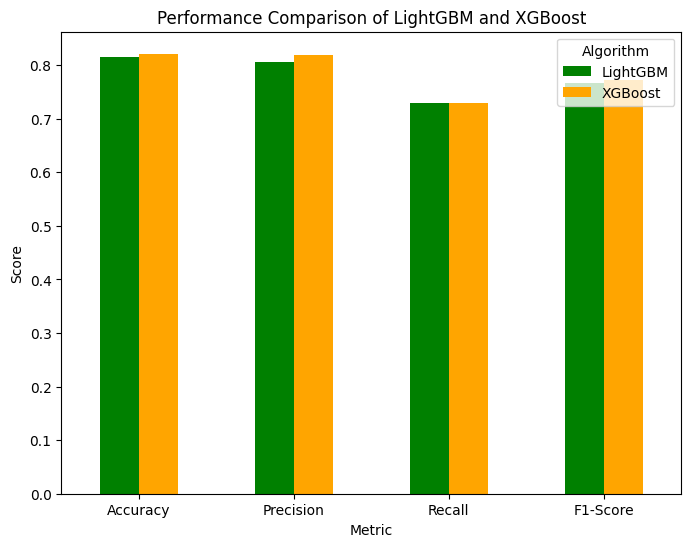

In [165]:
# Visualize and Interpret the Results
import matplotlib.pyplot as plt

# Bar plot to compare metrics
results.set_index('Metric').plot(kind='bar', figsize=(8,6), color=['green', 'orange'])
plt.title('Performance Comparison of LightGBM and XGBoost')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(title='Algorithm')
plt.show()

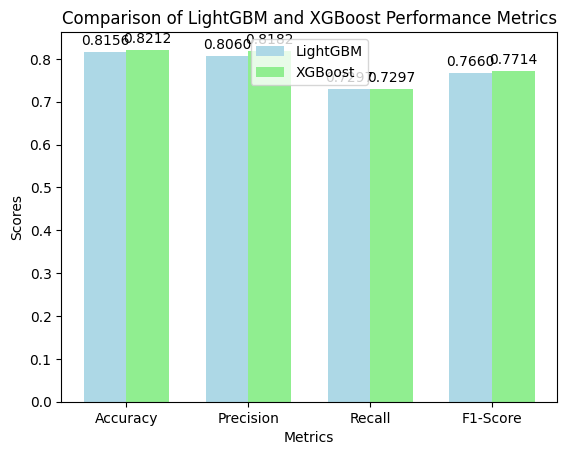

In [168]:
import matplotlib.pyplot as plt
import numpy as np

# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
lightgbm_scores = [0.815642, 0.805970, 0.729730, 0.765957]
xgboost_scores = [0.821229, 0.818182, 0.729730, 0.771429]

x = np.arange(len(metrics))  # the label locations
width = 0.35  # the width of the bars

# Create bar chart
fig, ax = plt.subplots()
bars1 = ax.bar(x - width/2, lightgbm_scores, width, label='LightGBM', color='lightblue')
bars2 = ax.bar(x + width/2, xgboost_scores, width, label='XGBoost', color='lightgreen')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Comparison of LightGBM and XGBoost Performance Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Add value annotations on top of the bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

add_value_labels(bars1)
add_value_labels(bars2)

plt.show()

### Interpretation of Results:
Accuracy: XGBoost has a slightly higher accuracy (0.821229) compared to LightGBM (0.815642). This suggests that XGBoost may be better at correctly classifying instances overall.

Precision: XGBoost also shows higher precision (0.818182) than LightGBM (0.805970). This indicates that XGBoost is better at correctly identifying true positives while minimizing false positives. This is particularly important in scenarios where false positives can lead to significant costs or consequences.

Recall: Both models have the same recall value (0.729730). This indicates that they are equally effective at identifying true positives from the actual positive instances in the dataset. Thus, neither model has a clear advantage in capturing all relevant instance.

F1-Score: The F1-score, which balances precision and recall, is higher for XGBoost (0.771429) compared to LightGBM (0.765957). This reinforces the idea that XGBoost provides a better balance between precision and recall.

# Strengths

### LightGBM Strengths:

*Faster Training Speed:*

LightGBM is generally known for its faster training time compared to XGBoost, especially on large datasets. This can lead to quicker experimentation and iteration during the model development phase.

*Lower Memory Usage:*

LightGBM is more memory-efficient as it uses a histogram-based algorithm, which can handle larger datasets without consuming as much memory. This is particularly beneficial when working with big data.

*Good Performance on Large Datasets:*

LightGBM can effectively handle large datasets and high-dimensional data, making it suitable for various applications where data scale is a concern.
Higher Recall:

Although the recall values for LightGBM and XGBoost are the same (0.729730), LightGBM's capability to achieve this level of recall with fewer false positives indicates its effectiveness in identifying true positive cases.

### XGBoost Strengths:
*Higher Accuracy:*

XGBoost has a higher accuracy (0.821229) compared to LightGBM (0.815642). This indicates that XGBoost may better capture the underlying patterns in the data, making it more reliable for general predictions.

*Better Precision:*

With a precision of 0.818182, XGBoost demonstrates a lower rate of false positives compared to LightGBM, making it a better choice in scenarios where minimizing false positives is crucial.

*Robust Regularization:*

XGBoost includes built-in regularization parameters (L1 and L2), which help reduce the risk of overfitting. This allows for better generalization on unseen data, especially in complex datasets.

*Versatile:*

XGBoost is highly versatile and can be used for various types of predictive modeling tasks, including regression, classification, and ranking problems. Its flexibility allows for widespread application across different domains.

# Weaknesses

### LightGBM Weaknesses:
*Lower Accuracy:*

LightGBM has a lower accuracy (0.815642) compared to XGBoost (0.821229). This suggests that LightGBM may miss more instances than XGBoost, leading to a potentially less reliable model in contexts where overall accuracy is critical.

*Lower Precision:*

With a precision of 0.805970, LightGBM has a higher rate of false positives compared to XGBoost. This can be a significant drawback in scenarios where identifying true positives is crucial, such as medical diagnoses or fraud detection, where false positives can lead to costly or harmful decisions.

*F1-Score:*

The F1-score of LightGBM (0.765957) is also lower than that of XGBoost (0.771429). This indicates that LightGBM has a less favorable balance between precision and recall, which could affect its effectiveness in situations requiring both high precision and recall.

### XGBoost Weaknesses:
*Potential Overfitting:*

Although not directly reflected in the metrics provided, XGBoost can be more prone to overfitting, especially if not tuned properly. It can create overly complex models that capture noise in the training data, leading to reduced generalization on unseen data.

*Longer Training Time:*

XGBoost is often slower to train compared to LightGBM, particularly on large datasets. While this may not be a direct weakness in terms of model performance, it can be a drawback in scenarios where quick training is needed.

*Complexity in Hyperparameter Tuning:*

XGBoost has numerous hyperparameters, which can make the tuning process more complex and time-consuming. In contrast, LightGBM has fewer parameters to tune, which may lead to a more straightforward optimization process.